<a target="_blank" href="https://colab.research.google.com/github/PacktPublishing/Deep-Learning-Model-Visualization/blob/main/Chapter02/DLMV_Chapter02_02_Seaborn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Chapter 02 - 02 - Seaborn

## Loading Data

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

## Exploring data

Looking at the data size and features and target labels.

In [2]:
print('Data shape:', iris.data.shape)
print('Feature names:', iris.feature_names)
print('Target shape', iris.target.shape)
print('Target values:', np.unique(iris.target))
print('Taret names:', iris.target_names)

Data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target shape (150,)
Target values: [0 1 2]
Taret names: ['setosa' 'versicolor' 'virginica']


In [3]:
import pandas as pd
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Import matplotlib

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams["figure.dpi"] = 300 # increase graphic quality if needed
sns.set_style("whitegrid")

# Barchart

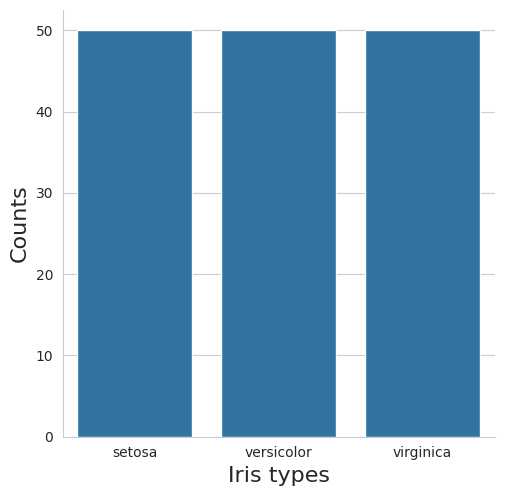

In [6]:
target_names = iris.target_names
g = sns.catplot(
    data=df,
    x="target",
    kind="count"); # of type FaceGrid
g.set_axis_labels(
    x_var="Iris types",
    y_var="Counts",
    fontsize=16)
g.set_xticklabels(target_names);

In [7]:
type(g)

seaborn.axisgrid.FacetGrid

## Scatter plot

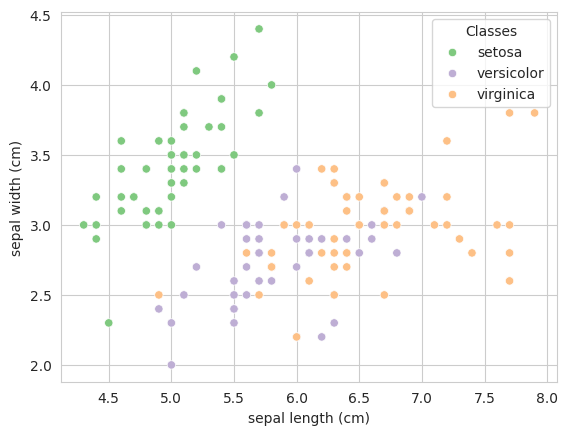

In [8]:
feature_names = iris.feature_names
feature0 = 0
feature1 = 1
ax = sns.scatterplot(
    data=df,
    x=feature_names[feature0],
    y=feature_names[feature1],
    hue='target',
    palette='Accent'
    )
# Access to individual labels
lg = ax.get_legend()
lg.set_title("Classes")
for t in lg.get_texts():
  t.set_text(
      target_names[int(t.get_text())]
  )

In [9]:
print(type(ax))
print(type(lg))

<class 'matplotlib.axes._axes.Axes'>
<class 'matplotlib.legend.Legend'>


## Distribution plot


JoinGrid for jointpot

PairGrid for pairplot

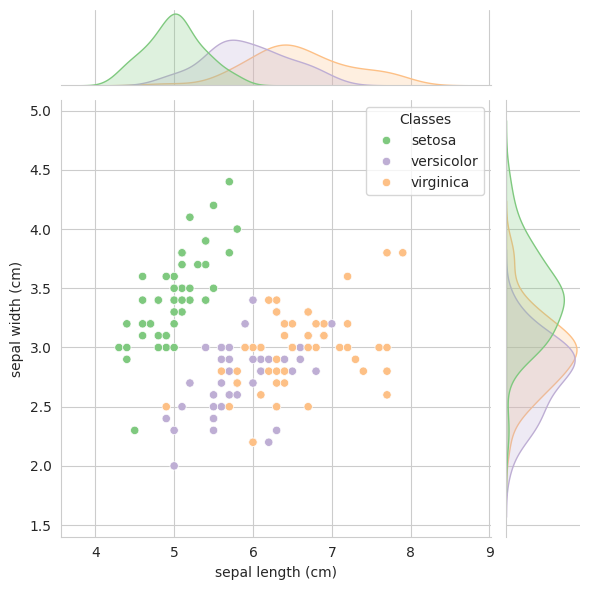

In [10]:
jg = sns.jointplot(
    data=df,
    x=feature_names[feature0],
    y=feature_names[feature1],
    hue="target",
    palette='Accent'
    )
# Access to the scatterplot
ax = jg.ax_joint
# Change legend
# Access to individual labels
lg = ax.get_legend()
lg.set_title("Classes")
for t in lg.get_texts():
  t.set_text(
      target_names[int(t.get_text())]
  )


In [11]:
print(type(jg))
print(type(ax))

<class 'seaborn.axisgrid.JointGrid'>
<class 'matplotlib.axes._axes.Axes'>


Rather than focusing on a single relationship (as in jointplot), pairplot visualizes every pairwise combination of variables simultaneously

In [ ]:
pg = sns.pairplot(
    data=df,
    hue="target",
    palette="Accent"
    )
# another way to customize the legend
sns.move_legend(
    pg, "lower center",
    bbox_to_anchor=(0.5, -0.035),
    labels=target_names,
    ncol=3,
    title='Classes',
    frameon=False,)

# Training

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# define model
model = keras.Sequential([
    keras.layers.Dense(
        units = 16,
        input_dim=4,
        activation ='relu',
        name='Hidden1'
    ),
    keras.layers.Dense(
        units = 32,
        input_dim=4,
        activation ='relu',
        name='Hidden2'
    ),
    keras.layers.Dense(
        units=3,
        activation='softmax',
        name='Output')
]);

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, # X
    iris.target, # y
    test_size=0.2
    )

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    batch_size = 32,
    epochs=50
    )

In [ ]:
train_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=((8,4)))
ax_loss = fig.add_subplot(121)
ax_accuracy = fig.add_subplot(122)
# loss metrics
sns.regplot(
    data=train_df,
    x=train_df.index,
    y='loss',
    order=3,
    ax=ax_loss,
    scatter_kws={"s": 10},
    label='Train loss'
    )
sns.regplot(
    data=train_df,
    x=train_df.index,
    y='val_loss',
    order=3,
    ax=ax_loss,
    scatter_kws={"s": 10},
    label='Test loss'
    )

# accuracy metrics
sns.regplot(
    data=train_df,
    x=train_df.index,
    y='accuracy',
    order=3,
    ax=ax_accuracy,
    scatter_kws={"s": 10},
    label='Train accuracy'
    )
sns.regplot(
    data=train_df,
    x=train_df.index,
    y='val_accuracy',
    order=3,
    ax=ax_accuracy,
    scatter_kws={"s": 10},
    label='Validation accuracy'
    )
# The legends and the layout
ax_loss.legend()
ax_accuracy.legend()
plt.tight_layout()

# Ananlyze results with confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cfm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred
    )
cfm

In [ ]:
ax = sns.heatmap(cfm, annot=True, cmap='Blues')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names)
ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
plt.show()